In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import warnings
warnings.filterwarnings('ignore')

In [89]:
data = pd.read_csv('data/news_cleaned.csv')

In [90]:
companies = ['3M', 'apple', 'amgen', 'american express', 'boeing', 'caterpillar', 'chevron', 'cisco', 'coca cola', 'dow', 'goldman sachs', 'home depot', 'honeywell', 'ibm', 'intel', 'johnson & johnson', 'jpmorgan', 'mcdonalds', 'merck', 'microsoft', 'nike', 'pfizer', 'procter & gamble', 'travelers', 'united health', 'verizon', 'visa', 'walgreens', 'walmart', 'walt disney']


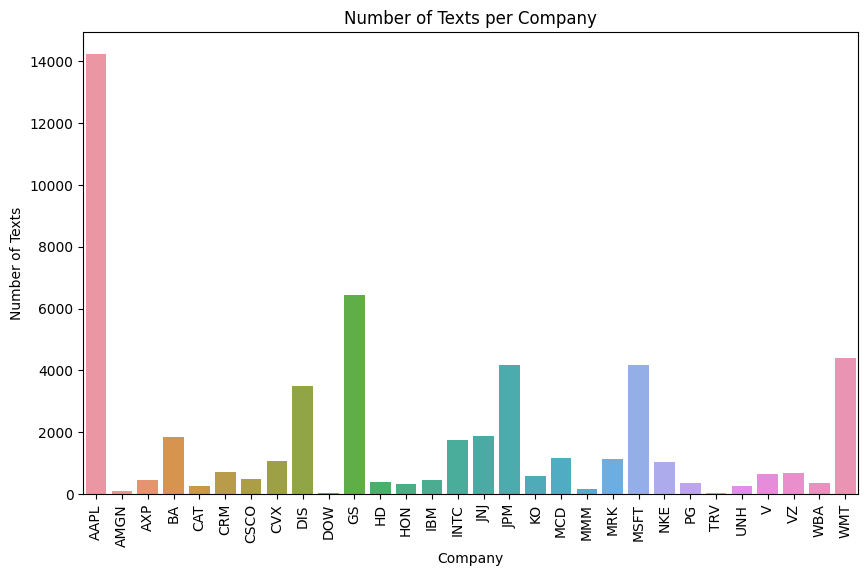

In [91]:
# Group by 'company' and count 'text'
grouped_data = data.groupby('company')['text'].count().reset_index()

# Rename the 'text' column to 'count'
grouped_data.rename(columns={'text': 'count'}, inplace=True)

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='company', y='count', data=grouped_data)
plt.title('Number of Texts per Company')
plt.xlabel('Company')
plt.ylabel('Number of Texts')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()

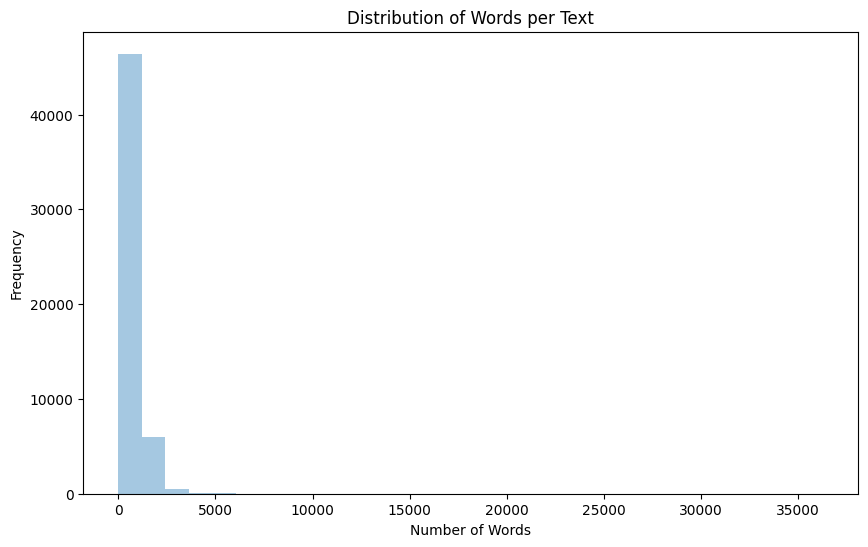

In [92]:
# Create a new column 'word_count' which is the count of words in each 'text'
data['word_count'] = data['text'].apply(lambda x: len(str(x).split()))

# Create the histogram
plt.figure(figsize=(10, 6))
sns.distplot(data['word_count'], kde=False, bins=30)
plt.title('Distribution of Words per Text')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

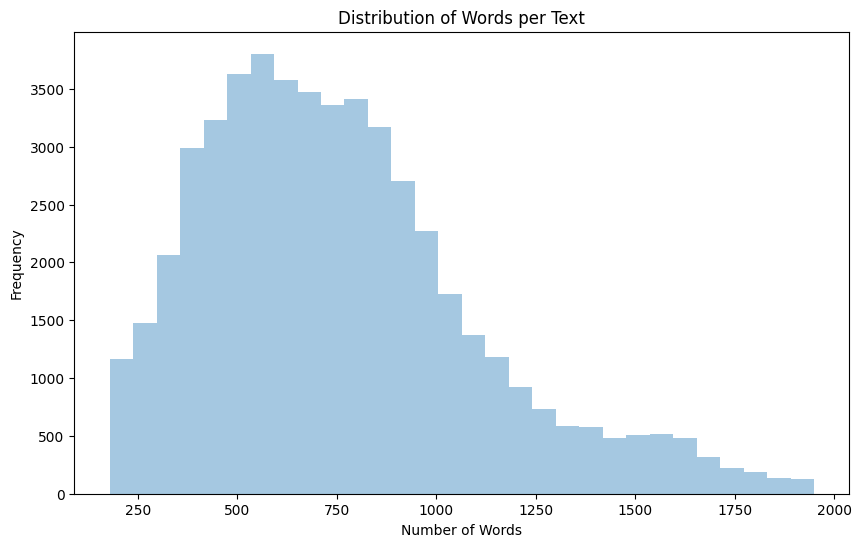

In [93]:
# Create a new column 'word_count' which is the count of words in each 'text'
data['word_count'] = data['text'].apply(lambda x: len(str(x).split()))

# Calculate the 2.5% and 97.5% percentiles
lower_bound, upper_bound = np.percentile(data['word_count'], [2.5, 97.5])
#Take the 2.5% and 97.5% percentiles of the 'word_count' column
data_nine_five = data[(data['word_count'] > lower_bound) & (data['word_count'] < upper_bound)]

# Create the histogram
plt.figure(figsize=(10, 6))
sns.distplot(data_nine_five['word_count'], kde=False, bins=30)
plt.title('Distribution of Words per Text')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')

plt.show()

In [94]:
data['text'] = data['text'].str.lower()
texts = data['text'].copy()

In [95]:
#Count number of distinct words in each text
company_times = np.zeros(len(texts))
for i, text in enumerate(texts):
    for company in companies:
        if company in text:
            company_times[i] += 1

In [96]:
unique, counts = np.unique(company_times, return_counts=True)

# print the distribution
for u, c in zip(unique, counts):
    print(f"Value: {u}, Count: {c}")

Value: 0.0, Count: 3159
Value: 1.0, Count: 14703
Value: 2.0, Count: 22048
Value: 3.0, Count: 9342
Value: 4.0, Count: 2709
Value: 5.0, Count: 772
Value: 6.0, Count: 191
Value: 7.0, Count: 83
Value: 8.0, Count: 47
Value: 9.0, Count: 12
Value: 10.0, Count: 5
Value: 11.0, Count: 2
Value: 12.0, Count: 2
Value: 23.0, Count: 7


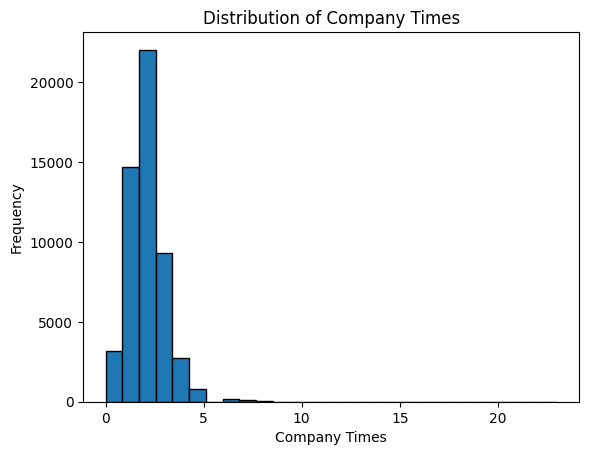

In [97]:
plt.hist(company_times, bins=27, edgecolor='black')
plt.title('Distribution of Company Times')
plt.xlabel('Company Times')
plt.ylabel('Frequency')
plt.show()

In [98]:
ticker_to_company = {'MMM' : '3m',
                     'AXP' : 'american express',
                     'AMGN' : 'amgen',
                     'AAPL' : 'apple',
                     'BA' : 'boeing',
                     'CAT' : 'caterpillar',
                     'CVX' : 'chevron',
                     'CSCO' : 'cisco',
                     'KO' : 'coca cola',
                     'DOW' : 'dow',
                     'GS' : 'goldman sachs',
                     'HD' : 'home depot',
                     'HON' : 'honeywell',
                     'INTC' : 'intel',
                     'IBM' : 'ibm',
                     'JPM' : 'jpmorgan',
                     'JNJ' : 'johnson & johnson',
                     'MCD' : 'mcdonalds',
                     'MRK' : 'merck',
                     'MSFT' : 'microsoft',
                     'NKE' : 'nike',
                     'PG' : 'procter & gamble',
                     'CRM' : 'salesforce',
                     'DIS' : 'walt disney',
                     'TRV' : 'travelers',
                     'UNH' : 'united health',
                     'VZ' : 'verizon',
                     'V' : 'visa',
                     'WBA' : 'walgreens',
                     'WMT' : 'walmart'}

In [99]:
data['company'] = data['company'].map(ticker_to_company)

In [100]:
data['sentences'] = data.apply(lambda row: [sentence for sentence in row['text'].split('. ') if row['company'] in sentence], axis=1)

In [101]:
data['num_sentences'] = data['sentences'].apply(len)

# plot the distribution
data['num_sentences'].describe()

count    53082.000000
mean         1.768867
std          2.801514
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         64.000000
Name: num_sentences, dtype: float64

In [102]:
news_sentences = data[['company', 'title', 'text', 'sentences', 'published']]

In [103]:
#create csv
news_sentences.to_csv('data/news_sentences.csv', index=False)